<a href="https://colab.research.google.com/github/anujthapamagar/FEDS/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Towards Machine Learning

## 1 Get data by py programming not manual downloading

In [3]:
import requests
from pathlib import Path

# storage for data in collab environment
data_path = Path("data/")

# If the data folder doesn't exist, download it and prepare it..
if data_path.is_dir():
  print(f"{data_path} directory already exists... skipping creaation")
else:
  print(f"{data_path} does not exist, creating one...")
  data_path.mkdir(parents=True, exist_ok=True)

# Download temp data
with open(data_path / "land_global_temperature_anomaly-1850-2023.csv", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/stenoe/FEDS/main/data/land_global_temperature_anomaly-1850-2023.csv")
  print("Downloading data...")
  f.write(request.content)


data directory already exists... skipping creaation


## 2 Load the data into pandas dataframe

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: xlabel='Year'>

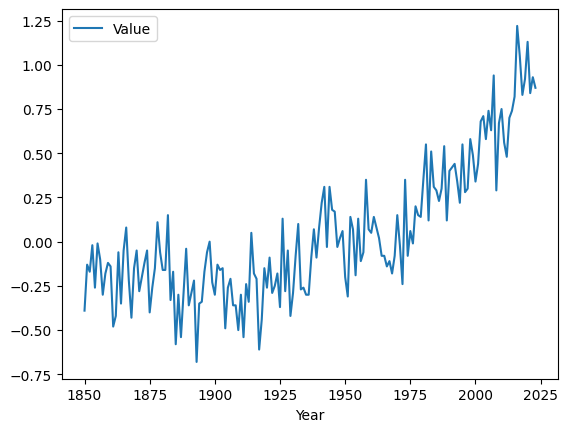

In [8]:
df = pd.read_csv("data/land_global_temperature_anomaly-1850-2023.csv", skiprows=4)
df.plot("Year", "Value")

In [9]:
dfn = df[df.Year >= 1975]

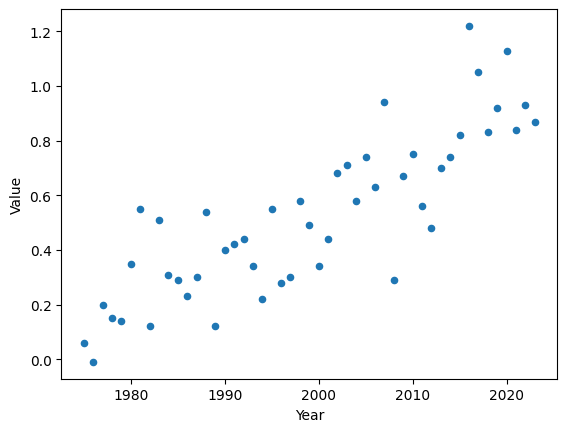

In [12]:
dfn.plot.scatter("Year","Value");

### 2.1 Make easiest linear regression

Using the standard ordinary least squares (OLS) algorithm which is minimizing the distance between the linear estimated model and the data.

In [14]:
reg = np.polyfit(dfn.Year, dfn.Value, deg=1)
reg

array([ 1.73520408e-02, -3.41614235e+01])

we have a linear model:
$$ f(x) = m x + b $$

Text(0, 0.5, 'temperature anomaly [°C]')

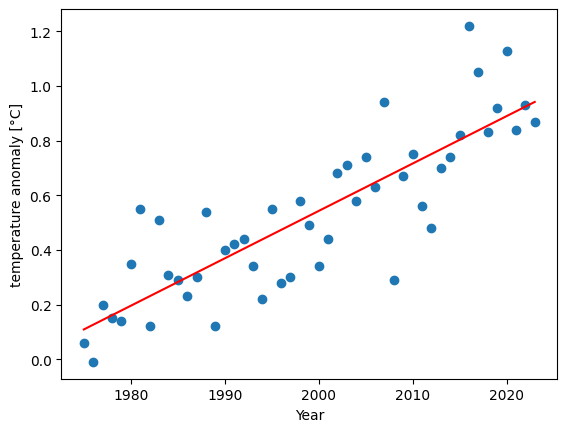

In [18]:
trend = np.polyval(reg, dfn.Year)
plt.scatter(dfn.Year, dfn.Value)
plt.plot(dfn.Year, trend, "r")
plt.xlabel("Year")
plt.ylabel("temperature anomaly [°C]")

### 3 Regression by using gradient descent algorithm

In [19]:
def update_w_and_b(years, values, w, b, alpha):
  dl_dw = 0.0
  dl_db = 0.0
  N = len(years)

  for i in range(N):
    dl_dw += -2 * years[i] * (values[i] - (w * years[i] + b))
    dl_db += -2 * (values[i] - (w * years[i] + b))

  # update w and b
  w = w - (1/float(N)) * dl_dw * alpha
  b = b - (1/float(N)) * dl_db * alpha

  # print(w, b)
  return w, b


### 3.3 Training function

In [20]:
from IPython.utils import process
def train(years, values, w, b, alpha, epochs):
    for e in range(epochs):
        w, b = update_w_and_b(years, values, w, b, alpha)

        # log the calculation process
        if e % 400 == 0:
            print(f"epoch: {e} loss: {avg_loss(years, values, w, b)}, w : {w}, b: {b}")

    return w, b
    


### 3.4 Loss function

Calculate the squared error!

In [21]:
def avg_loss(years, values, w, b):
    N = len(years)
    total_error = 0.0
    for i in range(N):
        total_error += (values[i] - (w * years[i] + b))**2

    return total_error

### 3.5 Make predictions

In [23]:
def predict(x, w, b):
  return w * x + b

### 3.6 Running the algorithm

In [30]:
w, b = train((dfn.Year-1975).tolist(),
             dfn.Value.tolist(),
             0.0, 0.0, 0.001, 15000)
x_new = 33.
y_new = predict(x_new, w, b)
print(y_new)

epoch: 0 loss: 6.3524963618285755, w : 0.03215551020408164, b: 0.0010506122448979591
epoch: 400 loss: 1.3017512725111478, w : 0.020075253869057785, b: 0.02083580365647573
epoch: 800 loss: 1.268705872683487, w : 0.019568189645940707, b: 0.03722544013194228
epoch: 1200 loss: 1.24682091976631, w : 0.0191555411447619, b: 0.0505633145433762
epoch: 1600 loss: 1.2323271879099889, w : 0.01881972809039501, b: 0.06141766717538721
epoch: 2000 loss: 1.222728434651623, w : 0.018546443667548273, b: 0.0702509315641301
epoch: 2400 loss: 1.2163714753102775, w : 0.01832404500019607, b: 0.07743943578973643
epoch: 2800 loss: 1.21216145646931, w : 0.01814305712417732, b: 0.08328943537396899
epoch: 3200 loss: 1.209373290352528, w : 0.017995769320451854, b: 0.08805016084083526
epoch: 3600 loss: 1.2075267736055908, w : 0.017875906611393808, b: 0.09192443581206011
epoch: 4000 loss: 1.2063038823021632, w : 0.017778362424710734, b: 0.09507731800556778
epoch: 4400 loss: 1.2054939989677835, w : 0.01769898103553277

### 3.7 Create prediction data using the estimated parameters

In [31]:
xp = np.linspace(0, 2023-1975, 100)
yp = predict(xp, w, b)

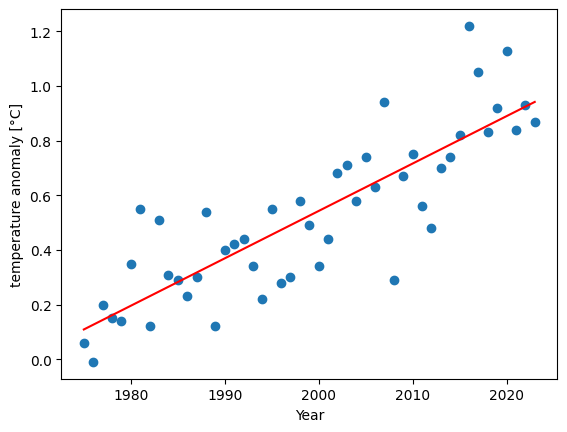

In [32]:
plt.scatter(dfn.Year, dfn.Value)
plt.plot(xp+1975, yp, "r")
plt.xlabel("Year")
plt.ylabel("temperature anomaly [°C]")
plt.show()